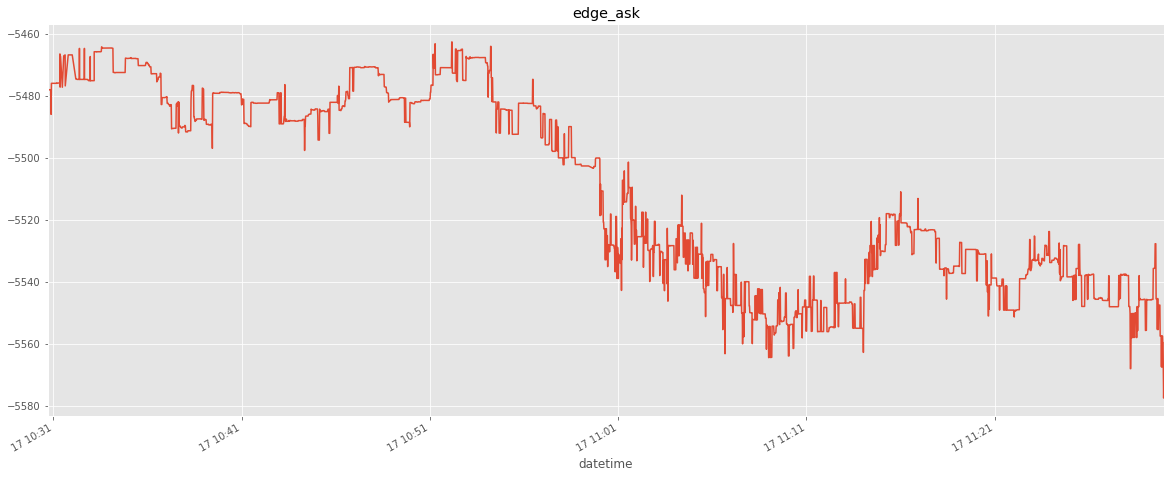

In [38]:
# encoding:utf-8
'''select one database, one collection and some docs '''
import datetime
import pymongo

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot')

# select host
default_client = pymongo.MongoClient('localhost', 27017)
# select database
tick_db = default_client['cross_border']

# list used to collect queried documents
list_result_for_timer = []
hedge_list = []

# date ranges used to construct query condition
date_list = [datetime.date(2017, 7, 17) + x for x in [
    datetime.timedelta(days=y) for y in range(1)]
]

# ######## begin to query data ########
for trading_d in date_list:
    start_datetime1 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 9, 0, 0)
    end_datetime1 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 10, 15, 0)
    start_datetime2 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 10, 30, 0)
    end_datetime2 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 11, 30, 0)
    start_datetime3 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 13, 30, 0)
    end_datetime3 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 15, 0, 0)

    query_time = {
        '$or':[
        # {'datetime':{'$gte':start_datetime1, '$lte':end_datetime1}},
        {'datetime':{'$gte':start_datetime2, '$lte':end_datetime2}},
        {'datetime':{'$gte':start_datetime3, '$lte':end_datetime3}}
        ],
        'on_timer':{'$eq': True}
    }

    # select collection and documents
    docs_for_timer = tick_db['SHFECrossBorderCMECopperStrategy'].find(
        query_time).sort([('datetime', pymongo.ASCENDING)])
    list_result_for_timer += list(docs_for_timer)
    
# ######## query data ended ########

# construct the dataframe
lead_df = pd.DataFrame(list_result_for_timer)
lead_df.index = lead_df.datetime

# plot
lead_df.edge_ask.plot(title=u'edge_ask', figsize=[20, 8])
plt.show()


In [29]:
dome_sign = 'cu'
dome_expire_year = ['17', '18']
dome_expire_month = ['01', '02', '03', '04', '05',
        '06', '07', '08', '09', '10', '11', '12']
dome_all_symbols = [dome_sign + x + y
    for x in dome_expire_year for y in dome_expire_month]

fore_sign = 'HG'
fore_expire_year = ['7', '8']
fore_expire_month = ['F', 'G', 'H', 'J', 'K', 'M',
        'N', 'Q', 'U', 'V', 'X', 'Z']
fore_all_symbols = [fore_sign + x + y
    for y in fore_expire_year for x in fore_expire_month]

symbol_pair = zip(dome_all_symbols, fore_all_symbols)
print(symbol_pair)

[('cu1701', 'HGF7'), ('cu1702', 'HGG7'), ('cu1703', 'HGH7'), ('cu1704', 'HGJ7'), ('cu1705', 'HGK7'), ('cu1706', 'HGM7'), ('cu1707', 'HGN7'), ('cu1708', 'HGQ7'), ('cu1709', 'HGU7'), ('cu1710', 'HGV7'), ('cu1711', 'HGX7'), ('cu1712', 'HGZ7'), ('cu1801', 'HGF8'), ('cu1802', 'HGG8'), ('cu1803', 'HGH8'), ('cu1804', 'HGJ8'), ('cu1805', 'HGK8'), ('cu1806', 'HGM8'), ('cu1807', 'HGN8'), ('cu1808', 'HGQ8'), ('cu1809', 'HGU8'), ('cu1810', 'HGV8'), ('cu1811', 'HGX8'), ('cu1812', 'HGZ8')]


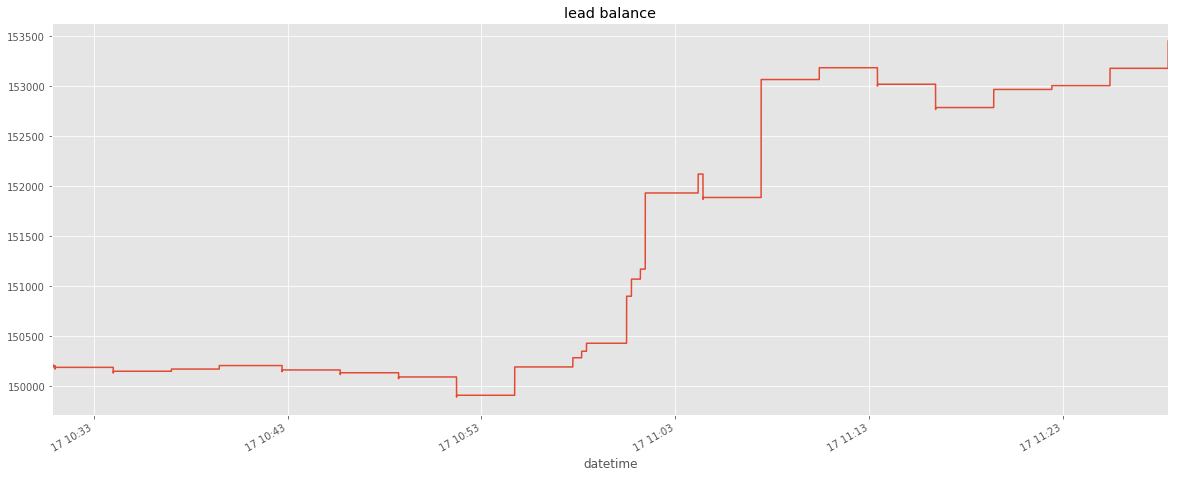

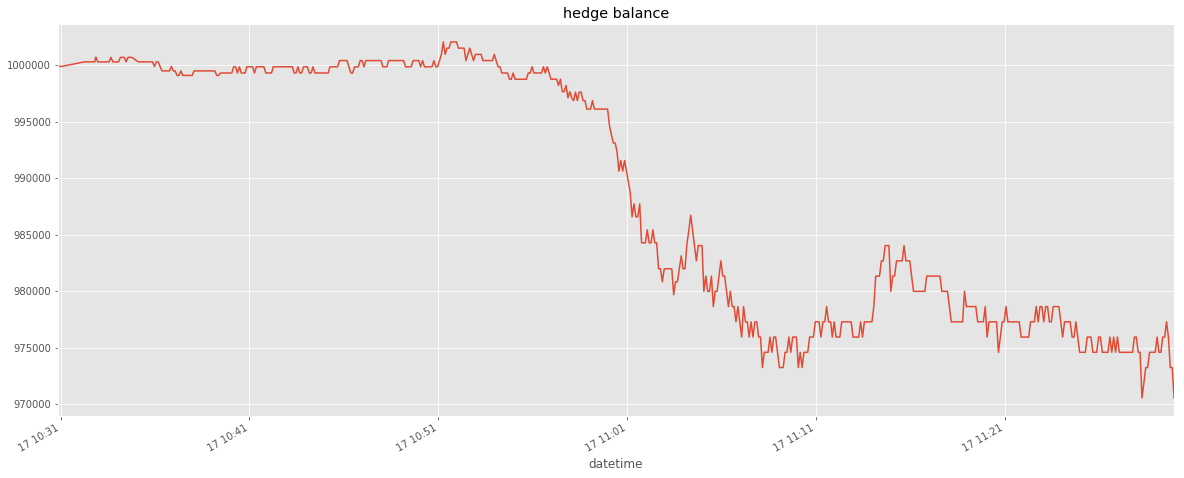

In [36]:
# encoding:utf-8
'''select one database, one collection and some docs '''
import datetime
import pymongo

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot')

# select host
default_client = pymongo.MongoClient('localhost', 27017)
# select database
tick_db = default_client['cross_border']

# list used to collect queried documents
lead_list = []
hedge_list = []

# date ranges used to construct query condition
date_list = [datetime.date(2017, 7, 17) + x for x in [
    datetime.timedelta(days=y) for y in range(1)]
]

# ######## begin to query data
for trading_d in date_list:
    start_datetime1 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 9, 0, 0)
    end_datetime1 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 10, 15, 0)
    start_datetime2 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 10, 30, 0)
    end_datetime2 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 11, 30, 0)
    start_datetime3 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 13, 30, 0)
    end_datetime3 = datetime.datetime(
        trading_d.year, trading_d.month, trading_d.day, 15, 0, 0)

    query_lead = {
        '$or':[
        # {'datetime':{'$gte':start_datetime1, '$lte':end_datetime1}},
        {'datetime':{'$gte':start_datetime2, '$lte':end_datetime2}},
        {'datetime':{'$gte':start_datetime3, '$lte':end_datetime3}}
        ],
        'accountID':{'$eq': 'DU739656.USD'},
        'on_account':{'$eq': True} 
    }
    
    query_hedge = {
        '$or':[
        # {'datetime':{'$gte':start_datetime1, '$lte':end_datetime1}},
        {'datetime':{'$gte':start_datetime2, '$lte':end_datetime2}},
        {'datetime':{'$gte':start_datetime3, '$lte':end_datetime3}}
        ],
        'accountID':{'$eq': '097636'},
        'on_account':{'$eq': True}
    }

    # select collection and documents
    docs_lead = tick_db['SHFECrossBorderCMECopperStrategy'].find(
        query_lead).sort([('datetime', pymongo.ASCENDING)])
    lead_list += list(docs_lead)
    
    # select collection and documents
    docs_hedge = tick_db['SHFECrossBorderCMECopperStrategy'].find(
        query_hedge).sort([('datetime', pymongo.ASCENDING)])
    hedge_list += list(docs_hedge)

# ######## query data ended 

# construct the dataframe
lead_df = pd.DataFrame(lead_list)
lead_df.index = lead_df.datetime

hedge_df = pd.DataFrame(hedge_list)
hedge_df.index = hedge_df.datetime

# plot
lead_df.balance.plot(title=u'lead balance', figsize=[20, 8])
plt.show()

hedge_df.balance.plot(title=u'hedge balance', figsize=[20, 8])
plt.show()

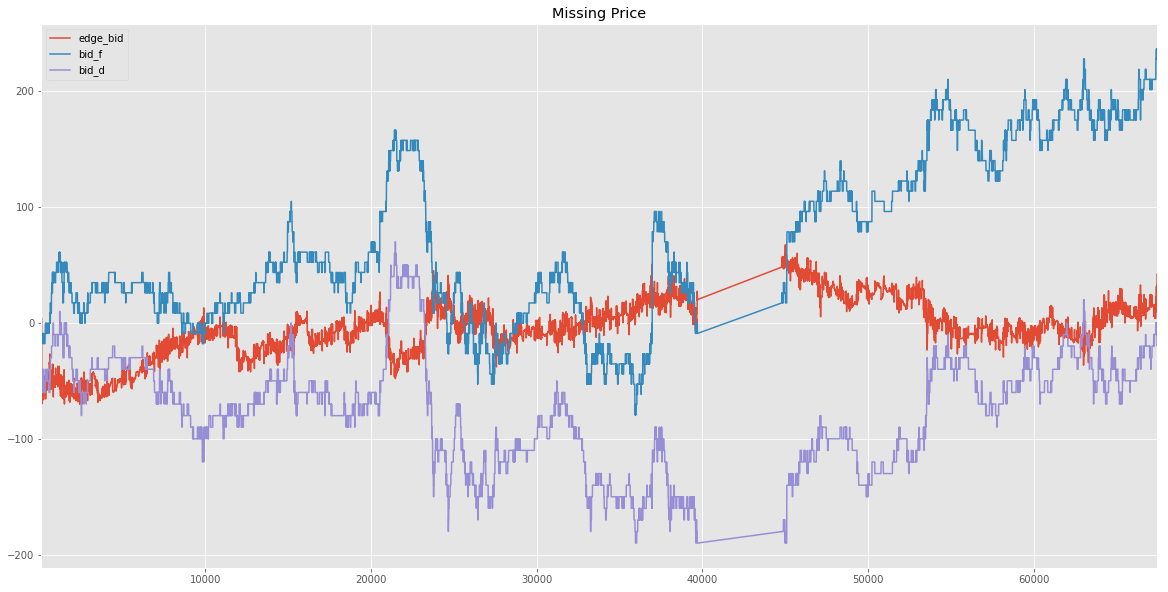

In [33]:
# encoding:utf-8
# 画出某个database的某个collection的某个column
import datetime
import pymongo

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
# 创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
# 选择数据库
tick_db = default_client['cross_border']
edge_long_list = []
edge_short_list = []

date_list = [datetime.date(2017, 7, 11) + x for x in [datetime.timedelta(days=y) for y in range(3)]]
for trading_d in date_list:
    start_datetime1 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 9, 0, 0)
    end_datetime1 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 10, 15, 0)
    start_datetime2 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 10, 30, 0)
    end_datetime2 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 11, 30, 0)
    start_datetime3 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 13, 30, 0)
    end_datetime3 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 15, 0, 0)

    time_query = {
        '$or':[{'datetime':{'$gte':start_datetime1, '$lte':end_datetime1}},
        {'datetime':{'$gte':start_datetime2, '$lte':end_datetime2}},
        {'datetime':{'$gte':start_datetime3, '$lte':end_datetime3}}
        ],
        'edge_bid': {'$gte': -5500, '$lte': -5300},
        #'ask_f': {'$gtd':2, 'lte':3},
        #'ask_d': {'$gtd':40000, 'lte':50000}
    }


    #选择collection和document
    docs_long = tick_db['SHFECrossBorderCMECopperStrategy'].find(time_query).sort([('datetime', pymongo.ASCENDING)])
    edge_long_list += list(docs_long)
    
result_long = pd.DataFrame(edge_long_list)
result_long.edge_bid += 5430
result_long.bid_d = result_long.bid_d - 47400
result_long.bid_f = result_long.bid_f * 2579 * 6.8 - 47000

result_long = result_long[result_long.edge_bid>-200]
result_long = result_long[result_long.bid_f>-200]
result_long = result_long[result_long.bid_d>-200]

result_long.edge_bid.plot(title=u'Missing Price', figsize=[20, 10], legend=True)
result_long.bid_f.plot(legend=True)
result_long.bid_d.plot(legend=True)

#result_long.to_csv('Missing Price.csv')
plt.show()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5         多
6         多
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
2234    NaN
2235    NaN
2236    NaN
2237    NaN
2238    NaN
2239    NaN
2240    NaN
2241    NaN
2242    NaN
2243    NaN
2244    NaN
2245    NaN
2246    NaN
2247    NaN
2248    NaN
2249    NaN
2250    NaN
2251    NaN
2252    NaN
2253    NaN
2254    NaN
2255    NaN
2256    NaN
2257    NaN
2258    NaN
2259    NaN
2260    NaN
2261    NaN
2262    NaN
2263    NaN
Name: direction, Length: 2264, dtype: object


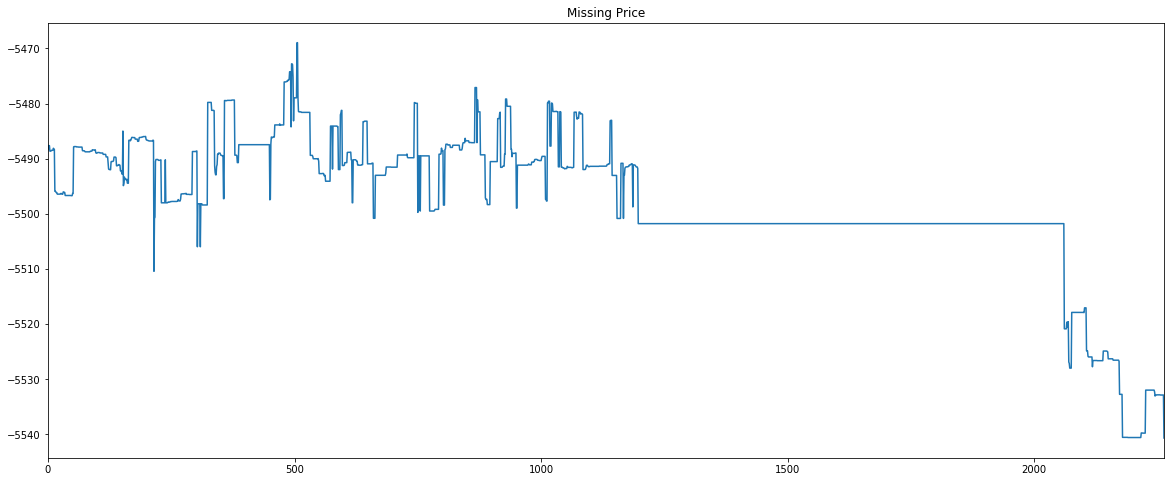

In [12]:
# encoding:utf-8
# 导出某个database的某个collection的某些record
import datetime
import pymongo

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.style.use('ggplot')
# 创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
# 选择数据库
tick_db = default_client['cross_border']
edge_long_list = []
edge_short_list = []

date_list = [datetime.date(2017, 7, 14) + x for x in [datetime.timedelta(days=y) for y in range(1)]]
for trading_d in date_list:
    start_datetime1 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 9, 0, 0)
    end_datetime1 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 10, 15, 0)
    start_datetime2 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 10, 30, 0)
    end_datetime2 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 11, 30, 0)
    start_datetime3 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 13, 30, 0)
    end_datetime3 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 15, 0, 0)

    _query = {
        '$or':[
            {'datetime':{'$gte':start_datetime1, '$lte':end_datetime1}},
        {'datetime':{'$gte':start_datetime2, '$lte':end_datetime2}},
        {'datetime':{'$gte':start_datetime3, '$lte':end_datetime3}}
        ],
        
        '$or':[
            {'on_timer':{'$eq': True}},
            {'on_order':{'$eq': True}},
            {'on_trade':{'$eq': True}},
            {'send_order':{'$eq': True}},
            {'cancel_order':{'$eq': True}}
        ]
    }


    #选择collection和document
    docs_long = tick_db['SHFECrossBorderCMECopperStrategy'].find(_query).sort([('datetime', pymongo.ASCENDING)])
    edge_long_list += list(docs_long)

result_long = pd.DataFrame(edge_long_list)
#result_long.value += 5380
result_long.edge_bid.plot(title=u'Missing Price', figsize=[20, 8])
print(result_long.direction)
result_long.to_csv('logging.csv', encoding='GBK')
plt.show()